# Запуск модели и сохранение полученных данных

In [41]:
import subprocess
import matplotlib.pyplot as plt
%matplotlib inline

mode = "L"
height = "200"
width = "200"
n_preys = "1000"
n_predators = "1000"
seed = "4142"

subprocess.run(["pp-model", mode, width, height, n_predators, n_preys, seed], stdout=subprocess.PIPE)

filename = '%sx%s_%s_%s_%s.csv' % (width, height, n_predators, n_preys, seed)
f = open(filename, 'r')

predators = []
preys = []

for line in f:
    data = line.split(',')
    predators.append(int(data[1]))
    preys.append(int(data[2]))
print(predators)
print(preys)

[1000, 1000, 1002, 1003, 1007, 1011, 1016, 1021, 1026, 1029, 1034, 1037, 1041, 1047, 1055, 1058, 1066, 1073, 1074, 1078, 441, 380, 361, 341, 312, 292, 277, 262, 246, 232, 210, 196, 180, 164, 146, 135, 114, 98, 86, 74, 61, 57, 50, 47, 45, 38, 33, 30, 28, 25, 25, 23, 21, 21, 19, 17, 14, 12, 12, 12, 11, 8, 6, 6, 4, 4, 4, 4, 4, 4, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
[1000, 913, 884, 857, 825, 797, 775, 754, 732, 714, 690, 674, 653, 635, 618, 606, 584, 568, 556, 542, 528, 523, 517, 514, 510, 505, 501, 497, 496, 492, 492, 491, 489, 489, 487, 484, 482, 480, 480, 479, 477, 475, 473, 473, 472, 472, 472, 472, 472, 472, 472, 471, 470, 470, 470, 470, 470, 470, 470, 470, 470, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469, 469]


# Анализ данных и построение графика завсимости количества агентов в моделе от числа шагов

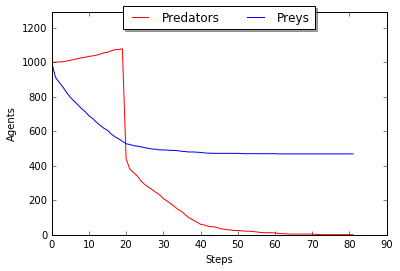

In [42]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

t = np.arange(0, len(predators))
plt.plot(t, predators, "r", label="Predators")
plt.plot(t, preys, "b", label="Preys")
plt.ylim([0, max(predators + preys) * 1.2])
plt.ylabel("Agents")
plt.xlabel("Steps")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), shadow=True, ncol=2)
plt.show()